<a href="https://colab.research.google.com/github/BrainConnection/Qiskit/blob/main/Project%20Quantum%20Challenge%202023/1.%20Quantum%20Chutes%20and%20Ladders/%231%20IONQ%20QPU.Harmony.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Environment Setting

In [1]:
!pip install qiskit
!pip install qiskit-ionq
!pip install qiskit[visualization]
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: decorator
    Found existing installation: decorator 4.4.2
    Uninstalling decorator-4.4.2:
      Successfully uninstalled decorator-4.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 r

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.7 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136818 sha256=3d30a4fc2622a3eba29c25a768d0e22ce1e069c5051bac7def38153efe085410
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [2]:
from qiskit import transpile
from qiskit_ionq import IonQProvider
from qiskit.visualization import plot_histogram
from matplotlib import pyplot as plt

from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library.standard_gates import C3XGate

In [3]:
# Save an IBM Quantum account and set it as your default account.
provider = IonQProvider("UzzeMcx6n1tPMvqRynIZf83nfVMCH3KY")

# Show all backends:
print(provider.backends())

# Get IonQ Hardware backend:
qpu_backend = provider.get_backend("ionq_qpu.harmony")
#qpu_backend = provider.get_backend("ionq_simulator")

[<IonQSimulatorBackend('ionq_simulator')>, <IonQQPUBackend('ionq_qpu')>]


#1. Fair Quantum Coin Operator & Four-Sided Fair Quantum Coin Operator

1) Quantum Coin State

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


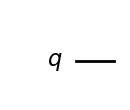

In [ ]:
Two_Sided_Fair_Coin = QuantumCircuit(1)
Two_Sided_Fair_Coin.draw("mpl")

2) Fair Quantum Coin Operator

Fair Quantum Coin Operator

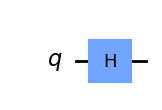

In [ ]:
Two_Sided_Fair_Coin = QuantumCircuit(1)
Two_Sided_Fair_Coin.h(0)

Two_Sided_Fair_Coin.draw("mpl")

Verifying Fair Quantum Coin Operator

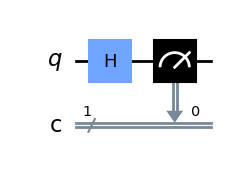

In [ ]:
qubits = QuantumRegister(1, 'q')
clbits = ClassicalRegister(1, 'c')
Two_Sided_Fair_Coin_Circuit = QuantumCircuit(qubits, clbits)
(q0,) = qubits
(c0,) = clbits

Two_Sided_Fair_Coin_Circuit.h(q0)
Two_Sided_Fair_Coin_Circuit.measure(q0, c0)

Two_Sided_Fair_Coin_Circuit_basis = transpile(Two_Sided_Fair_Coin_Circuit, qpu_backend)
Two_Sided_Fair_Coin_Circuit_basis.draw("mpl")

{'0': 5079, '1': 4921}
{'0': 0.5079, '1': 0.4921}


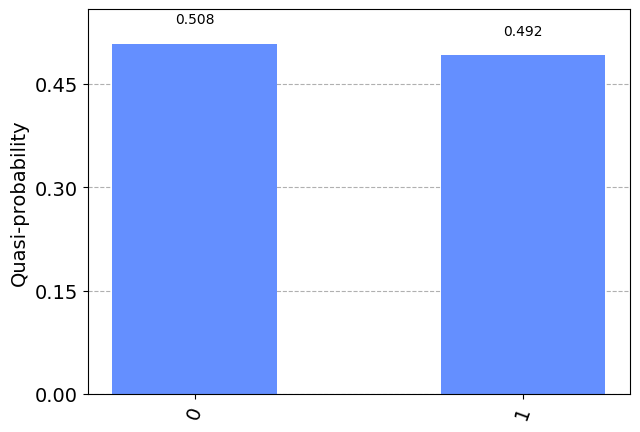

In [ ]:
# Run the circuit on IonQ's platform:
job = qpu_backend.run(Two_Sided_Fair_Coin_Circuit_basis, shots=10000)
print(job.get_counts())

print(job.get_probabilities())
plot_histogram(job.get_probabilities(), sort='asc')

3) Four-Sided Quantum Coin State

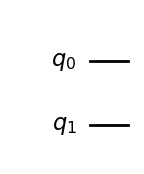

In [ ]:
Four_Sided_Fair_Coin = QuantumCircuit(2)
Four_Sided_Fair_Coin.draw("mpl")

4) Four-Sided Fair Quantum Coin Operator

Four-Sided Fair Quantum Coin Operator

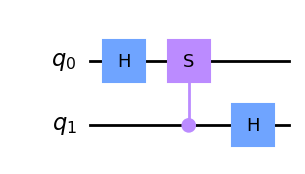

In [ ]:
from qiskit.circuit.library.standard_gates import SGate, TGate

csgate = SGate().control(1) # the parameter is the amount of control points you want

Four_Sided_Fair_Coin = QuantumCircuit(2)
Four_Sided_Fair_Coin.h(0)
Four_Sided_Fair_Coin.append(csgate, [1, 0])
Four_Sided_Fair_Coin.h(1)

Four_Sided_Fair_Coin.draw("mpl")

Verifying Four-Sided Fair Quantum Coin Operator

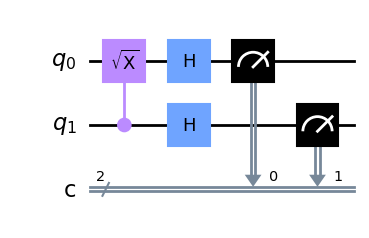

In [ ]:
qubits = QuantumRegister(2, 'q')
clbits = ClassicalRegister(2, 'c')
Four_Sided_Fair_Coin_Circuit = QuantumCircuit(qubits, clbits)
(q0,q1,) = qubits
(c0,c1,) = clbits

Four_Sided_Fair_Coin_Circuit.h(q0)
Four_Sided_Fair_Coin_Circuit.append(csgate, [q1, q0])
Four_Sided_Fair_Coin_Circuit.h(q1)
Four_Sided_Fair_Coin_Circuit.measure(qubits, clbits)

Four_Sided_Fair_Coin_Circuit_basis = transpile(Four_Sided_Fair_Coin_Circuit, qpu_backend)
Four_Sided_Fair_Coin_Circuit_basis.draw("mpl")

{'00': 3899, '01': 1971, '10': 2189, '11': 1941}
{'00': 0.3899, '01': 0.1971, '10': 0.2189, '11': 0.1941}


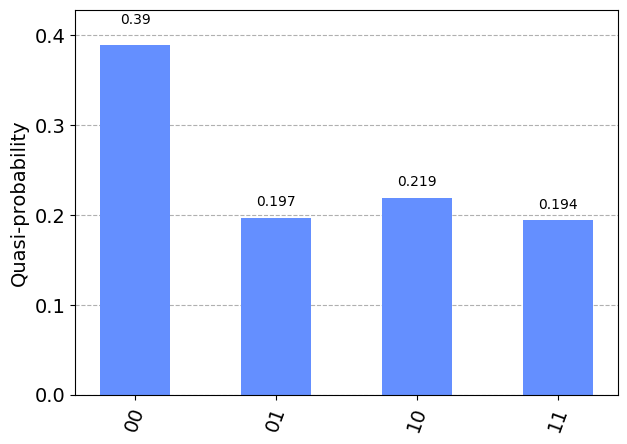

In [ ]:
# Run the circuit on IonQ's platform:
job = qpu_backend.run(Four_Sided_Fair_Coin_Circuit_basis, shots=10000)
print(job.get_counts())

print(job.get_probabilities())
plot_histogram(job.get_probabilities(), sort='asc')

5) Fairness Check

all matrix elements of each operator have same absolute value, thus unbiased coin

#2. Location on the Board

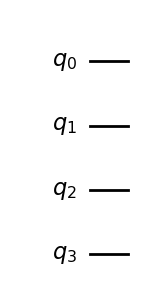

In [ ]:
qreg_q = QuantumRegister(4, 'q')
Board = QuantumCircuit(qreg_q)

Board.draw("mpl")

#3. Quantum Coin with Shift Operator

1) Shift Operator

Right Shift Operator

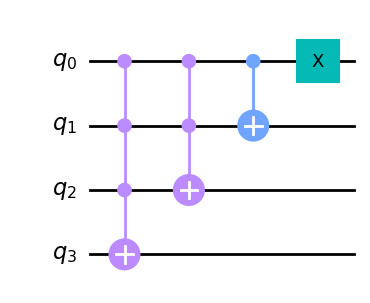

In [ ]:
qreg_q = QuantumRegister(4, 'q')
Shift = QuantumCircuit(qreg_q)

Shift.append(C3XGate(), [qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3]])
Shift.ccx(qreg_q[0], qreg_q[1], qreg_q[2])
Shift.cx(qreg_q[0], qreg_q[1])
Shift.x(qreg_q[0])

Shift.draw("mpl")

Verifying Right Shift Operator

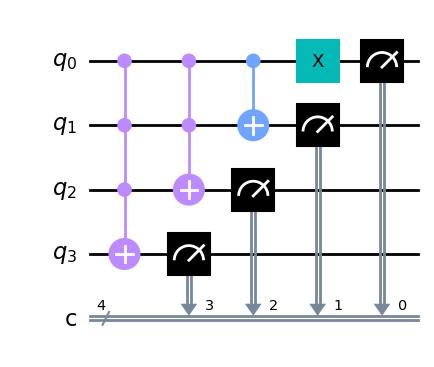

In [ ]:
from qiskit.circuit.library.standard_gates import C3XGate

qreg_q = QuantumRegister(4, 'q')
creg_c = ClassicalRegister(4, 'c')
Shift = QuantumCircuit(qreg_q, creg_c)

Shift.append(C3XGate(), [qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3]])
Shift.ccx(qreg_q[0], qreg_q[1], qreg_q[2])
Shift.cx(qreg_q[0], qreg_q[1])
Shift.x(qreg_q[0])

Shift.measure(qreg_q, creg_c)

Shift_basis = transpile(Shift, qpu_backend)
Shift_basis.draw("mpl")

{'0000': 80, '0001': 6338, '0010': 83, '0011': 825, '0100': 36, '0101': 1811, '0110': 47, '0111': 132, '1000': 9, '1001': 227, '1010': 44, '1011': 74, '1100': 16, '1101': 196, '1110': 15, '1111': 67}
{'0000': 0.008, '0001': 0.6338, '0010': 0.0083, '0011': 0.08249999999999999, '0100': 0.0036, '0101': 0.18109999999999998, '0110': 0.0047, '0111': 0.0132, '1000': 0.0009, '1001': 0.0227, '1010': 0.0044, '1011': 0.0073999999999999995, '1100': 0.0015999999999999999, '1101': 0.0196, '1110': 0.0015, '1111': 0.0067}


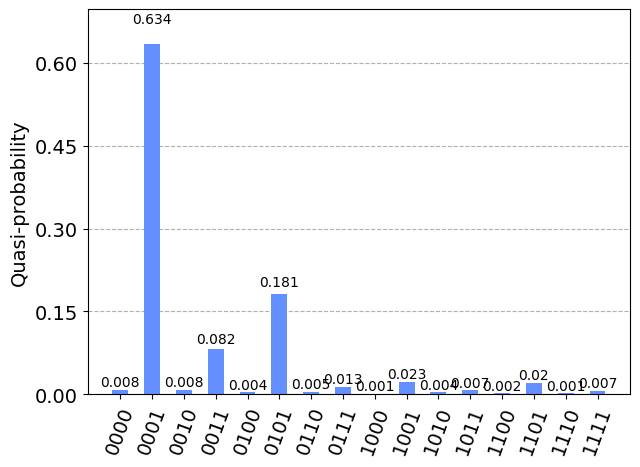

In [ ]:
# Run the circuit on IonQ's platform:
job = qpu_backend.run(Shift_basis, shots=10000)
print(job.get_counts())

print(job.get_probabilities())
plot_histogram(job.get_probabilities(), sort='asc')

2) Shift Operator with Quantum Coin Operator

Shift Operator

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


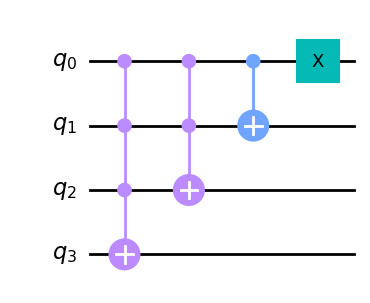

In [4]:
Shift = QuantumCircuit(4)
Shift.append(C3XGate(), [0,1,2,3])
Shift.ccx(0,1,2)
Shift.cx(0,1)
Shift.x(0)

Shift.draw("mpl")

1 Step Board Evolution Operator

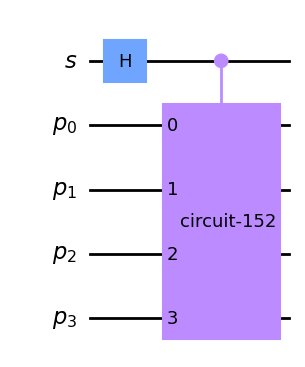

In [5]:
coin_bit = QuantumRegister(1, 's')
position_bits = QuantumRegister(4, 'p')
circuit = QuantumCircuit(coin_bit, position_bits)

s = coin_bit
p0, p1, p2, p3 = position_bits

Ugate = Shift.to_gate().control(1)
circuit.h(s)
circuit.append(Ugate, [s, p0, p1, p2, p3])

circuit.draw("mpl")

N Step Board Evolution Operator

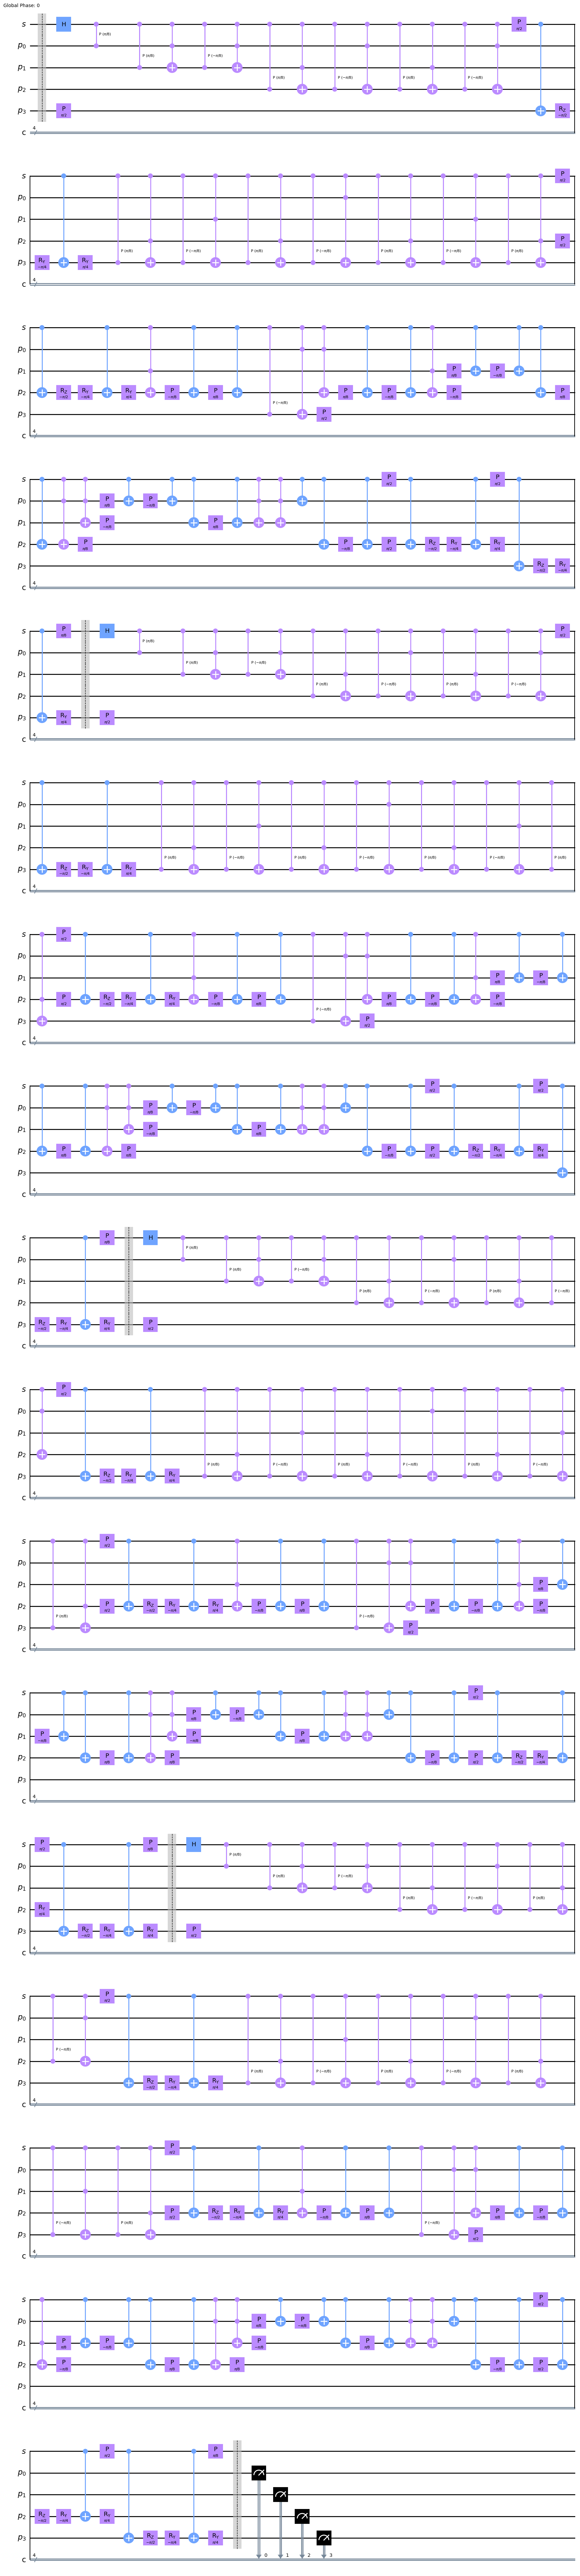

In [6]:
# varying N
N = 4

coin_bit = QuantumRegister(1, 's')
position_bits = QuantumRegister(4, 'p')
classical_bits = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(coin_bit, position_bits, classical_bits)

s = coin_bit
p0, p1, p2, p3 = position_bits
c0, c1, c2, c3 = classical_bits

Ugate = Shift.to_gate().control(1)

for i in range(N):
  circuit.barrier()
  circuit.h(s)
  circuit.append(Ugate, [s, p0, p1, p2, p3])

circuit.barrier()

circuit.measure([p0, p1, p2, p3], [c0, c1, c2, c3])

circuit_basis = transpile(circuit, qpu_backend)
circuit_basis.draw("mpl")

In [10]:
# Run the circuit on IonQ's platform:
job = qpu_backend.run(circuit_basis, shots=1000)
print(job.get_counts())

print(job.get_probabilities())
plot_histogram(job.get_probabilities(), sort='asc')

IonQJobFailureError: ignored

Verifying N Step Board Evolution Operator

In [ ]:
for N in range(50):
  coin_bit = QuantumRegister(1, 's')
  position_bits = QuantumRegister(4, 'p')
  classical_bis = ClassicalRegister(4, 'c')
  circuit = QuantumCircuit(coin_bit, position_bits, classical_bis)

  s = coin_bit
  p0, p1, p2, p3 = position_bits
  c0, c1, c2, c3 = classical_bis

  Ugate = Shift.to_gate().control(1)

  for i in range(N):
    circuit.barrier()
    circuit.h(s)
    circuit.append(Ugate, [s, p0, p1, p2, p3])

  circuit.barrier()

  circuit.measure([p0, p1, p2, p3], [c0, c1, c2, c3])

  circuit_basis = transpile(circuit, qpu_backend)

  job = qpu_backend.run(circuit_basis, shots=1000)
  print(N)
  print(job.get_counts())
  print(job.get_probabilities())

  board = ['0000','0001','0010','0011','0100','0101','0110','0111','1000','1001','1010','1011','1100','1101','1110','1111']
  prob = []
  for i in board:
    prob.append(dict(job.get_probabilities()).get(i, 0))

  plt.bar(board, prob, 0.5)
  plt.xticks(board)
  plt.show()
  print()
  print()

#4. Adding Chutes and Ladders in Board

1) Chutes & Ladder Operator (Notated CL)

Chutes & Ladder Operator

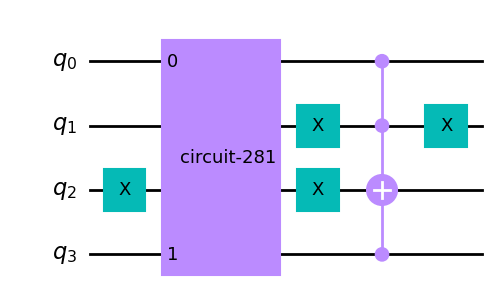

In [ ]:
CL = QuantumCircuit(4)

qc1 = QuantumCircuit(2)
qc1.swap(0,1)
Ugate = qc1.to_gate().control(2)

CL.x(2)
CL.append(Ugate, [1,2,0,3])
CL.x(2)
CL.x(1)
CL.append(C3XGate(), [0,1,3,2])
CL.x(1)

CL.draw("mpl")

Verifying Chutes & Ladder Operator (3 <-> 10)

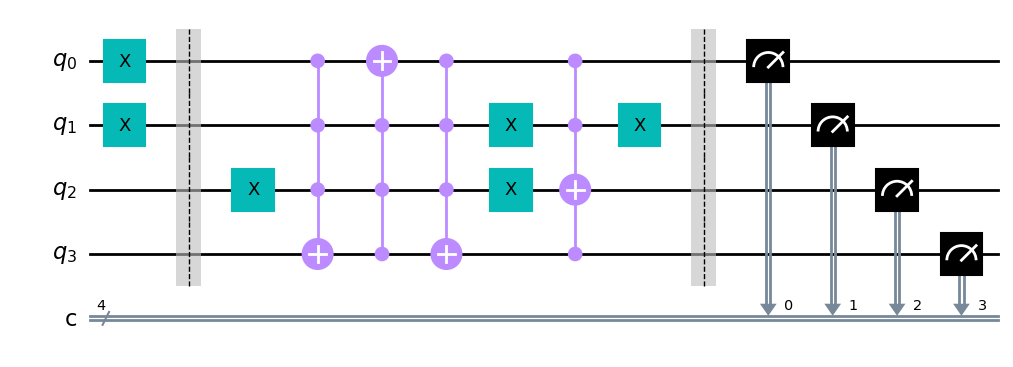

In [ ]:
q_reg = QuantumRegister(4, 'q')
c_reg = ClassicalRegister(4, 'c')
CL = QuantumCircuit(q_reg, c_reg)

qc1 = QuantumCircuit(2)
qc1.swap(0,1)
Ugate = qc1.to_gate().control(2)

CL.x(0)
CL.x(1)

CL.barrier()
CL.x(2)
CL.append(Ugate, [1,2,0,3])
CL.x(2)
CL.x(1)
CL.append(C3XGate(), [0,1,3,2])
CL.x(1)
CL.barrier()

CL.measure(q_reg, c_reg)

CL_basis = transpile(CL, qpu_backend)
CL_basis.draw("mpl")

{'0000': 254, '0001': 747, '0010': 536, '0011': 1298, '0100': 297, '0101': 550, '0110': 391, '0111': 755, '1000': 324, '1001': 940, '1010': 483, '1011': 1338, '1100': 174, '1101': 640, '1110': 435, '1111': 838}
{'0000': 0.0254, '0001': 0.0747, '0010': 0.053599999999999995, '0011': 0.1298, '0100': 0.029699999999999997, '0101': 0.055, '0110': 0.039099999999999996, '0111': 0.0755, '1000': 0.0324, '1001': 0.094, '1010': 0.048299999999999996, '1011': 0.1338, '1100': 0.0174, '1101': 0.064, '1110': 0.0435, '1111': 0.0838}


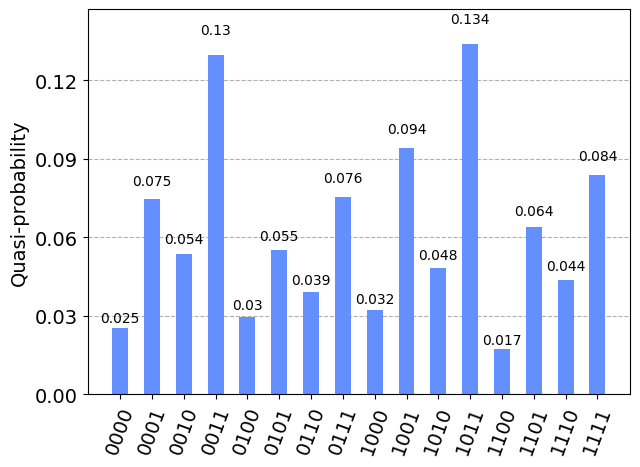

In [ ]:
# Run the circuit on IonQ's platform:
job = qpu_backend.run(CL_basis, shots=10000)
print(job.get_counts())

print(job.get_probabilities())
plot_histogram(job.get_probabilities(), sort='asc')

Verifying Chutes & Ladder Operator (9 <-> 13)

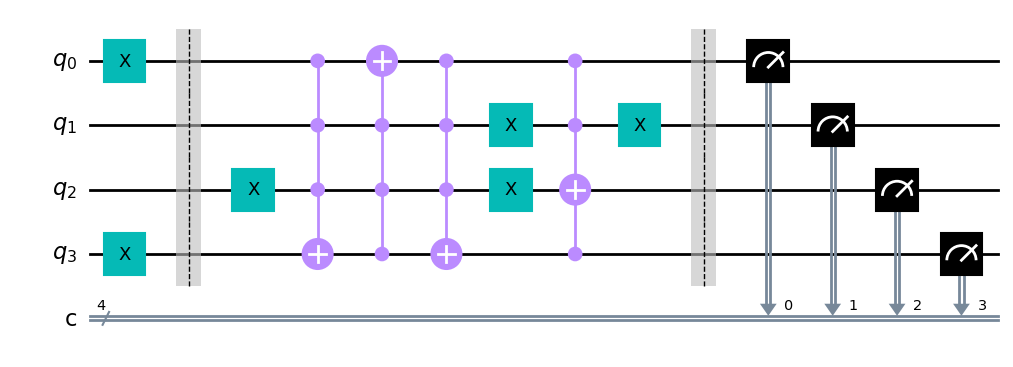

In [ ]:
q_reg = QuantumRegister(4, 'q')
c_reg = ClassicalRegister(4, 'c')
CL = QuantumCircuit(q_reg, c_reg)

qc1 = QuantumCircuit(2)
qc1.swap(0,1)
Ugate = qc1.to_gate().control(2)

CL.x(0)
CL.x(3)

CL.barrier()
CL.x(2)
CL.append(Ugate, [1,2,0,3])
CL.x(2)
CL.x(1)
CL.append(C3XGate(), [0,1,3,2])
CL.x(1)
CL.barrier()

CL.measure(q_reg, c_reg)

CL_basis = transpile(CL, qpu_backend)
CL_basis.draw("mpl")

{'0000': 31, '0001': 163, '0010': 40, '0011': 42, '0100': 34, '0101': 80, '0110': 16, '0111': 26, '1000': 62, '1001': 203, '1010': 18, '1011': 41, '1100': 39, '1101': 149, '1110': 23, '1111': 33}
{'0000': 0.031, '0001': 0.163, '0010': 0.04, '0011': 0.042, '0100': 0.034, '0101': 0.07999999999999999, '0110': 0.016, '0111': 0.026000000000000002, '1000': 0.062, '1001': 0.203, '1010': 0.018000000000000002, '1011': 0.041, '1100': 0.039, '1101': 0.14900000000000002, '1110': 0.023, '1111': 0.033}


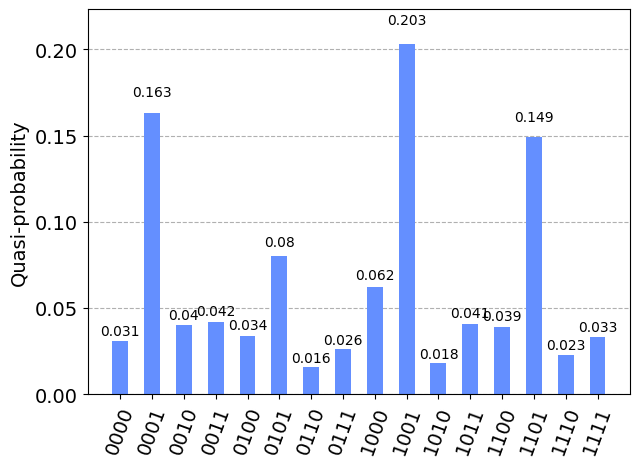

In [ ]:
# Run the circuit on IonQ's platform:
job = qpu_backend.run(CL_basis, shots=1000)
print(job.get_counts())

print(job.get_probabilities())
plot_histogram(job.get_probabilities(), sort='asc')

Verifying Chutes & Ladder Operator (7 <-> 7)

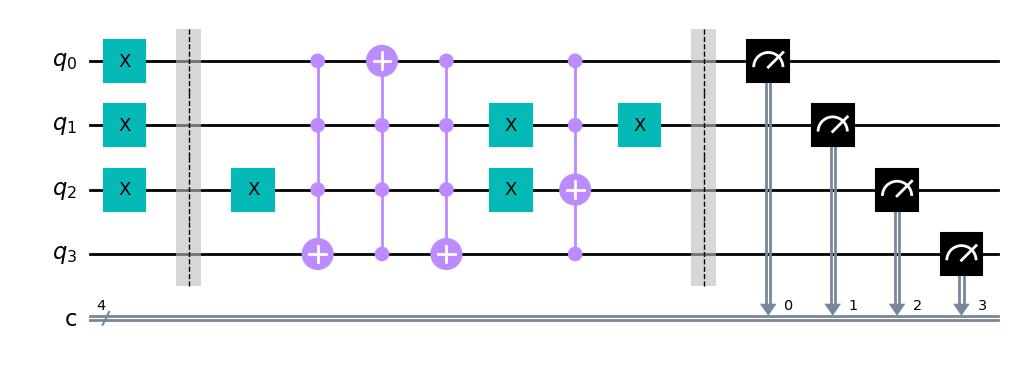

In [ ]:
q_reg = QuantumRegister(4, 'q')
c_reg = ClassicalRegister(4, 'c')
CL = QuantumCircuit(q_reg, c_reg)

qc1 = QuantumCircuit(2)
qc1.swap(0,1)
Ugate = qc1.to_gate().control(2)

CL.x(0)
CL.x(1)
CL.x(2)

CL.barrier()
CL.x(2)
CL.append(Ugate, [1,2,0,3])
CL.x(2)
CL.x(1)
CL.append(C3XGate(), [0,1,3,2])
CL.x(1)
CL.barrier()

CL.measure(q_reg, c_reg)

CL_basis = transpile(CL, qpu_backend)
CL_basis.draw("mpl")

{'0000': 19, '0001': 40, '0010': 50, '0011': 72, '0100': 20, '0101': 74, '0110': 64, '0111': 114, '1000': 20, '1001': 58, '1010': 91, '1011': 121, '1100': 30, '1101': 71, '1110': 69, '1111': 87}
{'0000': 0.019, '0001': 0.04, '0010': 0.05, '0011': 0.07200000000000001, '0100': 0.02, '0101': 0.07400000000000001, '0110': 0.064, '0111': 0.114, '1000': 0.02, '1001': 0.058, '1010': 0.091, '1011': 0.121, '1100': 0.03, '1101': 0.071, '1110': 0.069, '1111': 0.087}


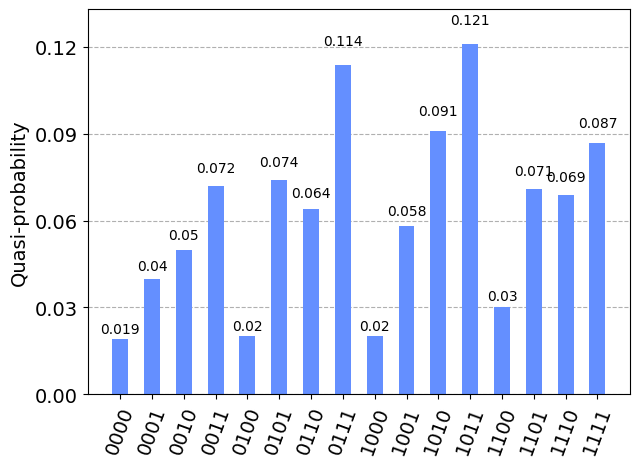

In [ ]:
# Run the circuit on IonQ's platform:
job = qpu_backend.run(CL_basis, shots=1000)
print(job.get_counts())

print(job.get_probabilities())
plot_histogram(job.get_probabilities(), sort='asc')

2) Chutes & Ladders Board Evolution Operator

Chutes & Ladder Operator

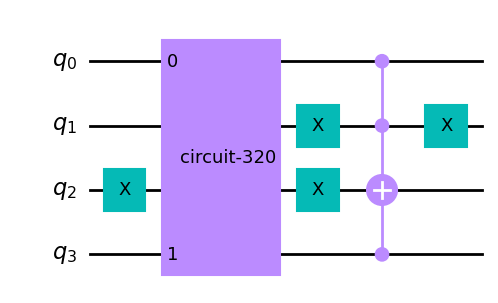

In [ ]:
CL = QuantumCircuit(4)

qc1 = QuantumCircuit(2)
qc1.swap(0,1)
Ugate = qc1.to_gate().control(2)

CL.x(2)
CL.append(Ugate, [1,2,0,3])
CL.x(2)
CL.x(1)
CL.append(C3XGate(), [0,1,3,2])
CL.x(1)

CL.draw("mpl")

1 Step Chutes & Ladders Board Evolution Operator

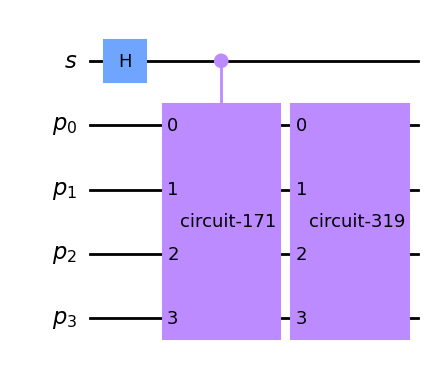

In [ ]:
coin_bit = QuantumRegister(1, 's')
position_bits = QuantumRegister(4, 'p')
circuit = QuantumCircuit(coin_bit, position_bits)

s = coin_bit
p0, p1, p2, p3 = position_bits

Ugate = Shift.to_gate().control(1)
circuit.h(s)
circuit.append(Ugate, [s, p0, p1, p2, p3])
circuit.append(CL, [p0, p1, p2, p3])

circuit.draw("mpl")

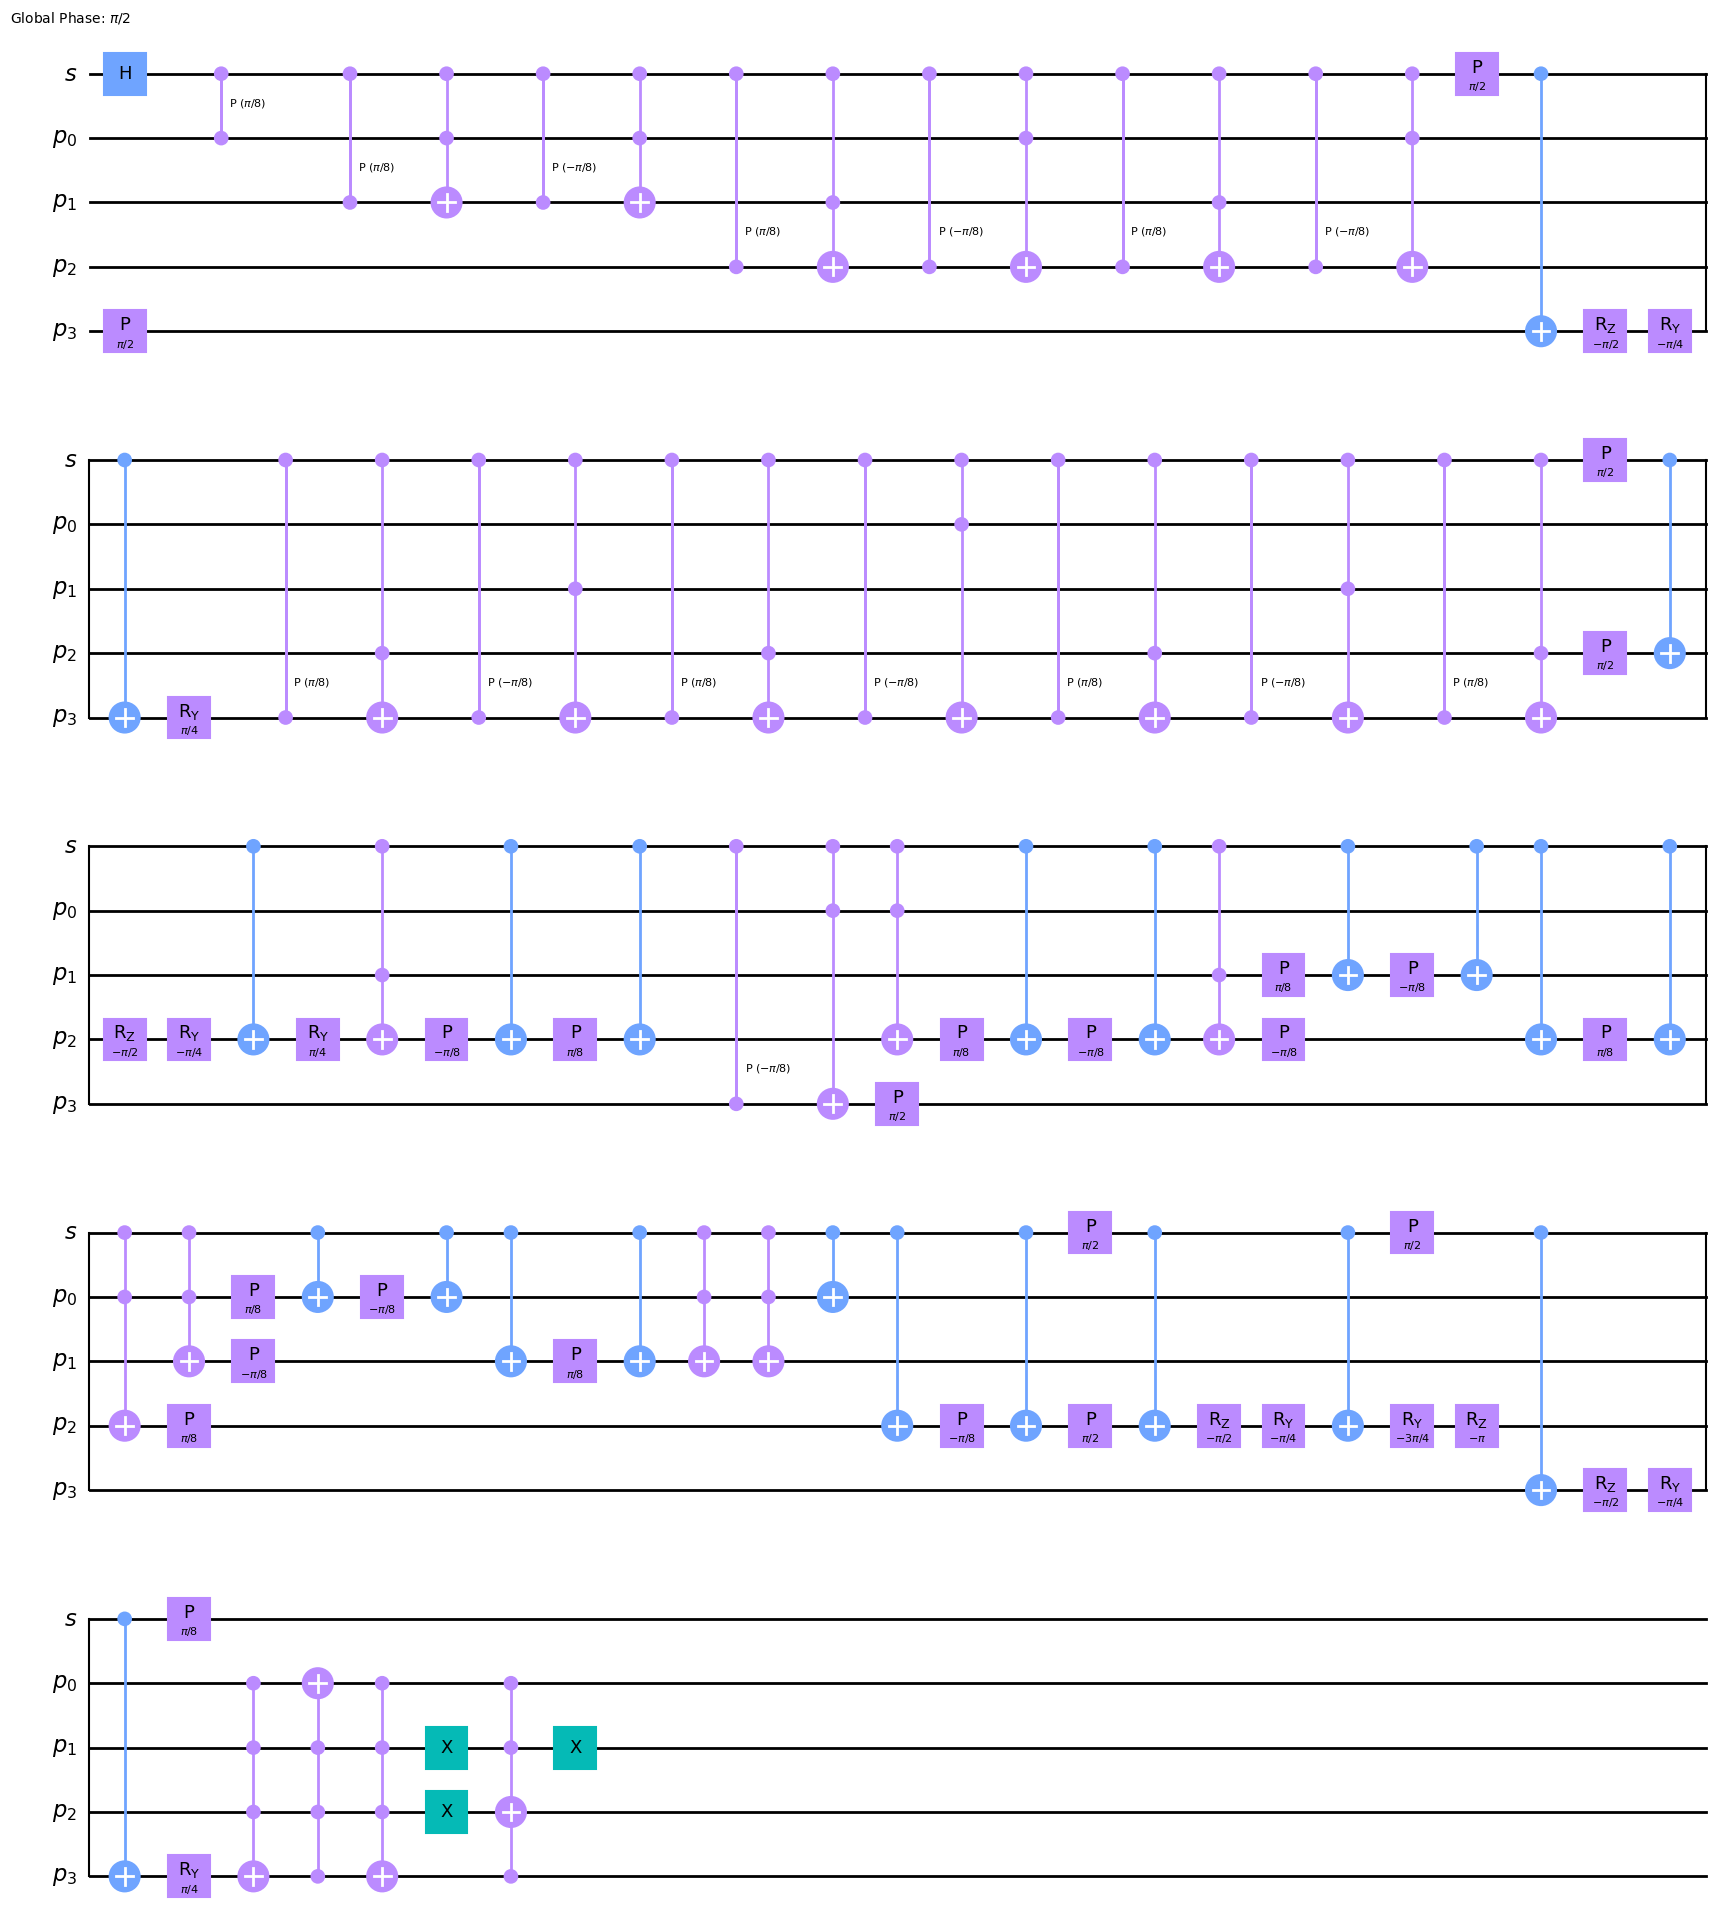

In [ ]:
coin_bit = QuantumRegister(1, 's')
position_bits = QuantumRegister(4, 'p')
circuit = QuantumCircuit(coin_bit, position_bits)

s = coin_bit
p0, p1, p2, p3 = position_bits

Ugate = Shift.to_gate().control(1)
circuit.h(s)
circuit.append(Ugate, [s, p0, p1, p2, p3])
circuit.append(CL, [p0, p1, p2, p3])

circuit_basis = transpile(circuit, qpu_backend)
circuit_basis.draw("mpl")

#5. Discussion

1) Role of Measurement in Quantum Chutes and Ladders Game

State measurement makes wave function collapse. Collapse of wave function arises randomness of Quantum Chutes and Ladders Game.

2) Measurement between Turns

Repetition of measurement and initializaing states is just repetition of 1 step evolution. Repetition of measurement can obtain probability of each state after 1 step evolution.

3) No Measurement between Turns

No measurement makes unitary evolution by each step. This procedure can obtain quantum superposition of states.

4) Quantum Analog of the "Memoryless" Nature of the Classical Game?

Quantum walks are quantum analogues of classical random walks.

Classical Walk : Walker occupy definite states and randomness arises from stocastic transitions defined by Markov's Process.

Quantum Walk : Randomness arises through quantum superposition of states, non-random, reversible unitary evolution and collapse of the wave function due to state measurements.

#6. Compare between #3 & #4 (10 Step)

1) Task 3 (Not Containing Chutes & Ladders)

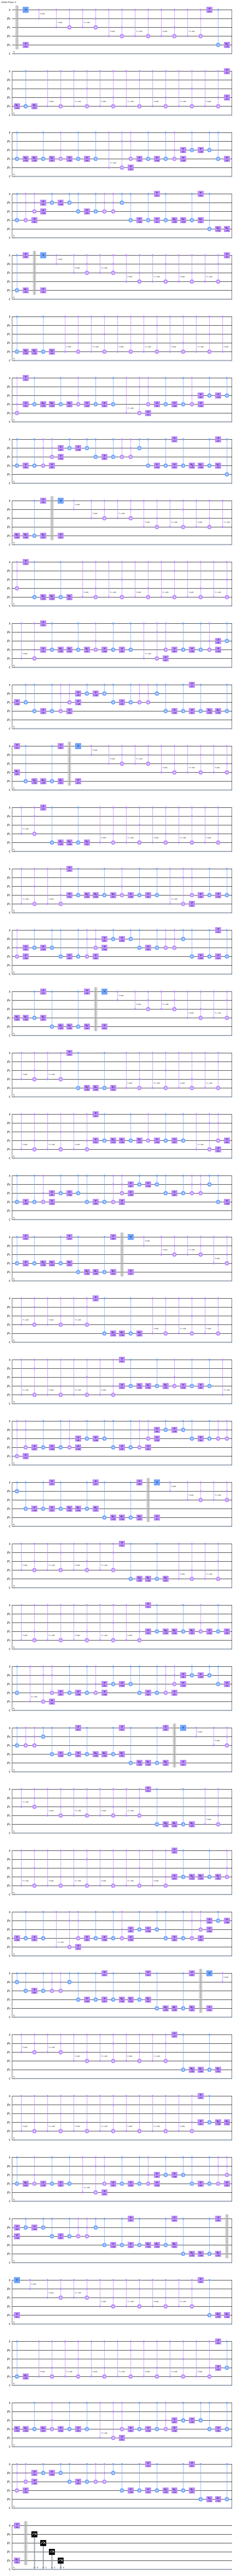

In [8]:
N = 10

coin_bit = QuantumRegister(1, 's')
position_bits = QuantumRegister(4, 'p')
classical_bits = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(coin_bit, position_bits, classical_bits)

s = coin_bit
p0, p1, p2, p3 = position_bits
c0, c1, c2, c3 = classical_bits

Ugate = Shift.to_gate().control(1)

for i in range(N):
  circuit.barrier()
  circuit.h(s)
  circuit.append(Ugate, [s, p0, p1, p2, p3])

circuit.barrier()

circuit.measure([p0, p1, p2, p3], [c0, c1, c2, c3])

circuit_basis = transpile(circuit, qpu_backend)
circuit_basis.draw("mpl")

In [9]:
# Run the circuit on IonQ's platform:
job = qpu_backend.run(circuit_basis, shots=1000)
print(job.get_counts())

print(job.get_probabilities())
plot_histogram(job.get_probabilities(), sort='asc')

IonQJobFailureError: ignored

2) Task 4 (Not Containing Chutes & Ladders)

In [ ]:
N = 10

coin_bit = QuantumRegister(1, 's')
position_bits = QuantumRegister(4, 'p')
classical_bits = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(coin_bit, position_bits, classical_bits)

s = coin_bit
p0, p1, p2, p3 = position_bits
c0, c1, c2, c3 = classical_bits

Ugate = Shift.to_gate().control(1)

for i in range(N):
  circuit.barrier()
  circuit.h(s)
  circuit.append(Ugate, [s, p0, p1, p2, p3])

  qc1 = QuantumCircuit(2)
  qc1.swap(0,1)
  CSwapgate = qc1.to_gate().control(2)

  circuit.x(p2)
  circuit.append(CSwapgate, [p1,p2,p0,p3])
  circuit.x(p2)
  circuit.x(p1)
  circuit.append(C3XGate(), [p0,p1,p3,p2])
  circuit.x(p1)

circuit.barrier()

circuit.measure([p0, p1, p2, p3], [c0, c1, c2, c3])

circuit_basis = transpile(circuit, qpu_backend)
circuit_basis.draw("mpl")

In [ ]:
# Run the circuit on IonQ's platform:
job = qpu_backend.run(circuit_basis, shots=1000)
print(job.get_counts())

print(job.get_probabilities())
plot_histogram(job.get_probabilities(), sort='asc')

3) N Step Board Operator Containing Chutes & Ladders

0
{'0000': 100}
{'0000': 1}


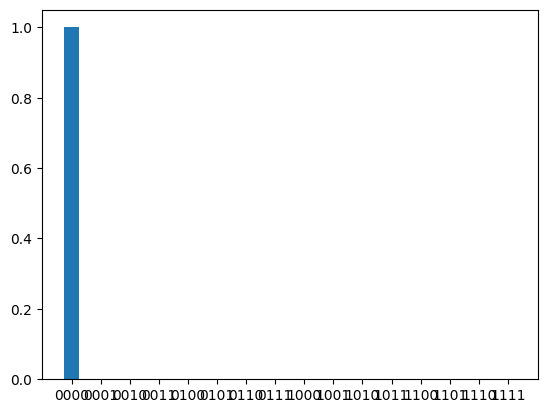



1


IonQJobFailureError: ignored

In [ ]:
for N in range(50):
  coin_bit = QuantumRegister(1, 's')
  position_bits = QuantumRegister(4, 'p')
  classical_bis = ClassicalRegister(4, 'c')
  circuit = QuantumCircuit(coin_bit, position_bits, classical_bis)

  s = coin_bit
  p0, p1, p2, p3 = position_bits
  c0, c1, c2, c3 = classical_bis

  Ugate = Shift.to_gate().control(1)

  for i in range(N):
    circuit.barrier()
    circuit.h(s)
    circuit.append(Ugate, [s, p0, p1, p2, p3])

    qc1 = QuantumCircuit(2)
    qc1.swap(0,1)
    CSwapgate = qc1.to_gate().control(2)

    circuit.x(p2)
    circuit.append(CSwapgate, [p1,p2,p0,p3])
    circuit.x(p2)
    circuit.x(p1)
    circuit.append(C3XGate(), [p0,p1,p3,p2])
    circuit.x(p1)

  circuit.barrier()

  circuit.measure([p0, p1, p2, p3], [c0, c1, c2, c3])

  circuit_basis = transpile(circuit, qpu_backend)

  job = qpu_backend.run(circuit_basis, shots=1000)
  print(N)
  print(job.get_counts())
  print(job.get_probabilities())

  board = ['0000','0001','0010','0011','0100','0101','0110','0111','1000','1001','1010','1011','1100','1101','1110','1111']
  prob = []
  for i in board:
    prob.append(dict(job.get_probabilities()).get(i, 0))

  plt.bar(board, prob, 0.5)
  plt.xticks(board)
  plt.show()
  print()
  print()